In [4]:
# import analysis library
import pandas as pd, numpy as np 
import seaborn  as sns
import matplotlib.pyplot as plt
%matplotlib inline
%pylab inline
plt.style.use('ggplot')
# import iris dataset 
from sklearn import datasets

Populating the interactive namespace from numpy and matplotlib


## 1) Load data

In [251]:
#cd analysis/iris

In [23]:
df_iris=pd.read_csv('iris.csv')

In [42]:
df_iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
Id               150 non-null int64
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), int64(1), object(1)
memory usage: 7.1+ KB


In [50]:
df_iris['Species'].value_counts()

Iris-virginica     50
Iris-setosa        50
Iris-versicolor    50
Name: Species, dtype: int64

In [28]:
df_iris.head(3)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10b092c18>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x10b411668>]], dtype=object)

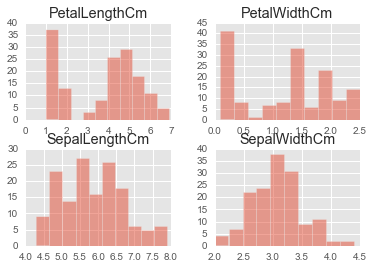

In [41]:
df_iris.iloc[:,1:].hist(alpha = .5)

## 2) Dara preprocess

In [46]:
df_iris.head(2)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa


In [77]:
#df_iris['species'] = df_iris.map(lambda x : 0 if x== 'Iris-virginica',
#                                            1 if x== 'Iris-setosa',
#                                            2 if x== 'Iris-versicolor'
#                                for x in df_iris.Species )
#df_iris['species'] = df_iris.map(lambda x :  0 if x== 'Iris-virginica')
#df_iris.map(lambda X: x == 'Iris-virginica', df_iris.Species))

In [70]:
def species_encode(x):
    if x == 'Iris-virginica':
        return 0 
    if x == 'Iris-setosa':
        return 1 
    if x == 'Iris-versicolor':
        return 2

In [73]:
df_iris['species_'] =  df_iris.Species.map(lambda x : species_encode(x))

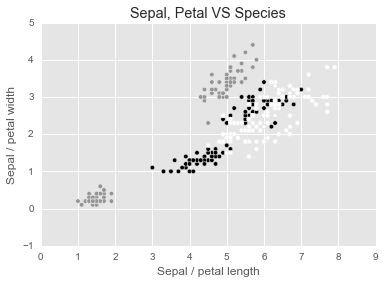

In [149]:
plt.scatter(df_iris.iloc[:,1:2],df_iris.iloc[:,2:3],c=df_iris.species_)
plt.scatter(df_iris.iloc[:,3:4],df_iris.iloc[:,4:5],c=df_iris.species_)

#plt.legend(set(df_iris.Species),loc='best')
plt.title('Sepal, Petal VS Species')
plt.xlabel('Sepal / petal length')
plt.ylabel('Sepal / petal width')
plt.show()

In [250]:
#set(df_iris.species_)

In [75]:
df_iris.head(2)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,species_
0,1,5.1,3.5,1.4,0.2,Iris-setosa,1
1,2,4.9,3.0,1.4,0.2,Iris-setosa,1


## 3) ML

In [174]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score


def train(df,model):
    df_ = df.copy()
    X = df_.iloc[:,1:5]
    y = df_.iloc[:,6:7]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
    clf_ = model.fit(X_train, y_train)
    print ('test score :', model.score(X_test,y_test) )
    y_true = y_test
    y_pred = clf_.predict(X_test)
    print (confusion_matrix(y_true, y_pred))
    #print (clf_)
    return clf_
       

In [152]:
#X = df_iris.iloc[:,1:5]
#y = df_iris.iloc[:,6:7]
# train, cross-validation, and test data split 
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

### 3-1) Decision Tree

In [167]:
from sklearn import tree
clf_tree = tree.DecisionTreeRegressor()
clf_tree_ = train(df_iris,clf_tree )

test score : 0.870884441575
[[15  0  1]
 [ 0 19  0]
 [ 0  0 15]]


### 3-2) Random Forest

In [169]:
from sklearn.ensemble import RandomForestClassifier
clf_rf = RandomForestClassifier()
clf_rf_ = train(df_iris,clf_rf )

test score : 0.98
[[15  0  1]
 [ 0 19  0]
 [ 0  0 15]]


//anaconda/envs/g_dash/lib/python3.4/site-packages/ipykernel_launcher.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # Remove the CWD from sys.path while we load stuff.


### 3-3) Logistic Regression

In [172]:
from sklearn import linear_model
clf_logistic = linear_model.LogisticRegression(C=1e5)
clf_logistic_ = train(df_iris,clf_logistic )

test score : 0.98
[[15  0  1]
 [ 0 19  0]
 [ 0  0 15]]


//anaconda/envs/g_dash/lib/python3.4/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


### 3-4) Ensemble Models

In [246]:
def ensemble_model(df,model1,model2,model3):
    df_ = df.copy()
    X = df_.iloc[:,1:5]
    y = df_.iloc[:,6:7]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
    prediction = pd.DataFrame()
    prediction = y_test.reset_index()
    prediction['predict1'] = model1.predict(X_test)
    prediction['predict2'] = model2.predict(X_test)
    prediction['predict3'] = model3.predict(X_test)
    # ensemble : voting 
    prediction['predict_ensemble'] = prediction.iloc[:,2:5].mode(axis=1)
    print (prediction.head(3))
    print (confusion_matrix(prediction.species_, prediction.predict_ensemble))
    #print ('enseble score :' )
    return prediction
    

In [248]:
predict_ensemble_ = ensemble_model(df_iris,clf1,clf2,clf3)

   index  species_  predict1  predict2  predict3  predict_ensemble
0     73         2       2.0         2         2               2.0
1     18         1       1.0         1         1               1.0
2    118         0       0.0         0         0               0.0
[[15  0  1]
 [ 0 19  0]
 [ 0  0 15]]


In [249]:
#from sklearn.ensemble import BaggingClassifier
#from sklearn.ensemble import VotingClassifier
#clf1 = clf_tree_
#clf2 = clf_rf_
#clf3 = clf_logistic_
#eclf = VotingClassifier(estimators=[('tree', clf1), ('rf', clf2), ('logistic', clf3)], voting='hard')
